In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Seed biar hasil konsisten
np.random.seed(42)
tf.random.set_seed(42)


In [53]:
path = r'students_dropout_academic_success.csv'
data = pd.read_csv(path)

data.head()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [54]:
print("Shape:", data.shape)
print("Kolom:", data.columns.tolist())


Shape: (4424, 37)
Kolom: ['Marital Status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP'

In [55]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [56]:
data.isnull().sum().sort_values(ascending=False)


Marital Status                                    0
Age at enrollment                                 0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
International                                     0
Scholarship holder                                0
Application 

In [57]:
data['target'].value_counts()


Graduate    2209
Dropout     1421
Enrolled     794
Name: target, dtype: int64

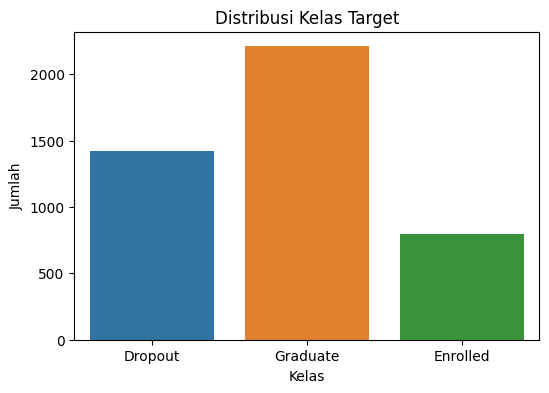

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['target'])
plt.title("Distribusi Kelas Target")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()


In [59]:
X = data.drop(columns=['target'])
y = data['target']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (4424, 36)
y shape: (4424,)


In [60]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

print("Mapping kelas:", dict(zip(le.classes_, le.transform(le.classes_))))


Mapping kelas: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [62]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test  = scaler.transform(X_test_raw)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (3539, 36) (3539,)
Test : (885, 36) (885,)


In [63]:
num_classes = 3
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test,  num_classes=num_classes)

y_train_cat[:5]


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [64]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0005)),
    Dropout(0.20),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.10),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                2368      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 4,547
Trainable params: 4,547
Non-trainable params: 0
_________________________________________________________________


In [65]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = dict(zip(classes, weights))

print("class_weight:", class_weight)


class_weight: {0: 1.0375256523013778, 1: 1.857742782152231, 2: 0.6676098849273722}


In [66]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weight,
    verbose=1
)


Epoch 1/50
89/89 [==============================] - 1s 5ms/step - loss: 1.0012 - accuracy: 0.6008 - val_loss: 0.8070 - val_accuracy: 0.7133
Epoch 2/50
89/89 [==============================] - 0s 3ms/step - loss: 0.8519 - accuracy: 0.6835 - val_loss: 0.7394 - val_accuracy: 0.7260
Epoch 3/50
89/89 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.7029 - val_loss: 0.7406 - val_accuracy: 0.7076
Epoch 4/50
89/89 [==============================] - 0s 3ms/step - loss: 0.7679 - accuracy: 0.7301 - val_loss: 0.7197 - val_accuracy: 0.7048
Epoch 5/50
89/89 [==============================] - 0s 3ms/step - loss: 0.7429 - accuracy: 0.7234 - val_loss: 0.6748 - val_accuracy: 0.7345
Epoch 6/50
89/89 [==============================] - 0s 3ms/step - loss: 0.7295 - accuracy: 0.7411 - val_loss: 0.6802 - val_accuracy: 0.7288
Epoch 7/50
89/89 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.7386 - val_loss: 0.6795 - val_accuracy: 0.7260
Epoch 8/50
89/89 [==

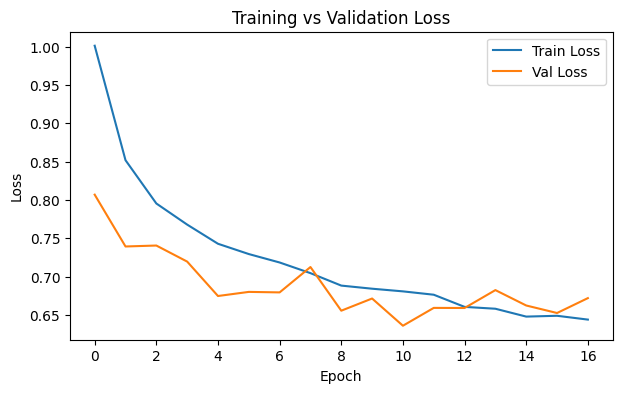

In [67]:
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


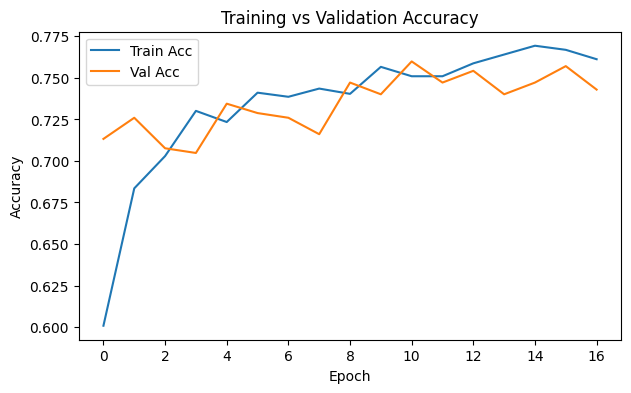

In [68]:
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [69]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


28/28 [==============================] - 0s 2ms/step


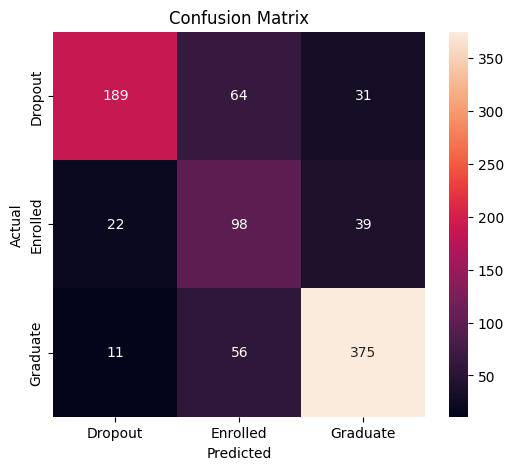

In [70]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [71]:
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

     Dropout       0.85      0.67      0.75       284
    Enrolled       0.45      0.62      0.52       159
    Graduate       0.84      0.85      0.85       442

    accuracy                           0.75       885
   macro avg       0.71      0.71      0.70       885
weighted avg       0.77      0.75      0.76       885



In [72]:
import numpy as np

# Prediksi semua test
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
conf = np.max(y_pred_prob, axis=1)

def pick_example(true_class, min_conf=0.75):
    idxs = np.where((y_test == true_class) & (y_pred == true_class) & (conf >= min_conf))[0]
    if len(idxs) == 0:
        # kalau tidak ada yang >=0.75, ambil yang confidence paling tinggi
        idxs = np.where((y_test == true_class) & (y_pred == true_class))[0]
        best = idxs[np.argmax(conf[idxs])]
        return best, conf[best]
    return idxs[0], conf[idxs[0]]

for cls_name in le.classes_:
    cls_id = int(np.where(le.classes_ == cls_name)[0][0])
    i, c = pick_example(cls_id, min_conf=0.75)
    print(cls_name, "-> test_index:", i, "confidence:", float(c))


28/28 [==============================] - 0s 2ms/step
Dropout -> test_index: 12 confidence: 0.7522696256637573
Enrolled -> test_index: 23 confidence: 0.8548814654350281
Graduate -> test_index: 0 confidence: 0.8974069356918335


In [73]:
i = 0
sample = X_test_raw.iloc[i:i+1]
sample_scaled = scaler.transform(sample)

prob = model.predict(sample_scaled)
pred = np.argmax(prob, axis=1)[0]

print("Prob:", prob)
print("Prediksi:", le.classes_[pred])
print("Label asli:", le.classes_[y_test[i]])


1/1 [==============================] - 0s 24ms/step
Prob: [[0.02338041 0.07921274 0.8974068 ]]
Prediksi: Graduate
Label asli: Graduate


In [74]:
import joblib

model.save("ann_student_status.keras")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

print("✅ Model + scaler + encoder + kolom berhasil disimpan.")


✅ Model + scaler + encoder + kolom berhasil disimpan.
